<a href="https://colab.research.google.com/github/kkkonts/coursera-matstat-AB/blob/main/hw05_simple_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции.

In [3]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')
%matplotlib inline

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените:

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`.

385.79840920193135

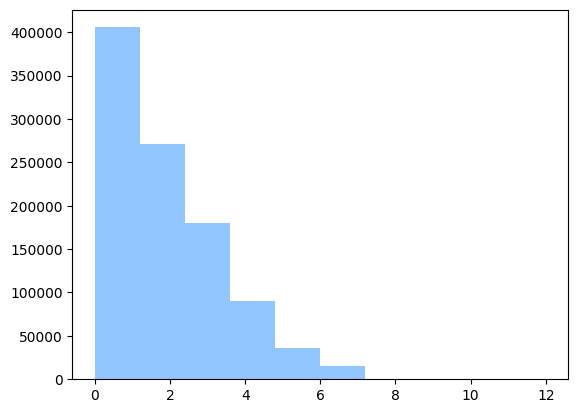

In [3]:
n_obs = 10**6
pois_rv = sts.poisson(2)
x = pois_rv.rvs(n_obs)
ans1 = np.sum(x > 6) / n_obs
ans2 = np.sum(x > 6) / np.sum(x > 5) / n_obs
ans3 = np.sum((x > 5) & (x < 7)) / n_obs
ans4 = (x**3).mean()
ans5 = (x[x > 5]).mean() / (np.sum(x > 5) / n_obs)

plt.hist(x)
ans5

In [12]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2
# Похожие тесты скрыты от вас

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток.

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину.

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [41]:
uniform_rv = sts.uniform(1, 3)
expon_rv = sts.expon(0.3)

t1 = uniform_rv.rvs(n_obs)
t2 = uniform_rv.rvs(n_obs)
t = expon_rv.rvs(n_obs)
df = pd.DataFrame({'t1': t1, 't2': t2, 't': t})

#2 * p(T <= 1.5 | T1 < T, T2 > T) = 2 * p(T <= 1.5, T1 < T, T2 > T) / p(T1 < T, T2 > T)


p_ABC = np.sum((df['t'] <= 1.5) &
               ((df['t1'] - df['t']) * (df['t2'] - df['t']) < 0)) / n_obs #p(T <= 1.5, (T1 - T) * (T2 - T) < 0)
p_BC = np.sum((df['t1'] - df['t']) * (df['t2'] - df['t']) < 0) / n_obs #p((T1 - T) * (T2 - T) < 0)
ans6 = p_ABC / p_BC
ans6

0.1940387179041326

In [42]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1
# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения:

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [48]:
theta = 10
alpha = 2

uniform_rv = sts.uniform(0, 1)
y = uniform_rv.rvs(n_obs)

x = theta**(y**(1/alpha))

ans7 = np.mean(x)
ans7

5.294883677368954

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой.

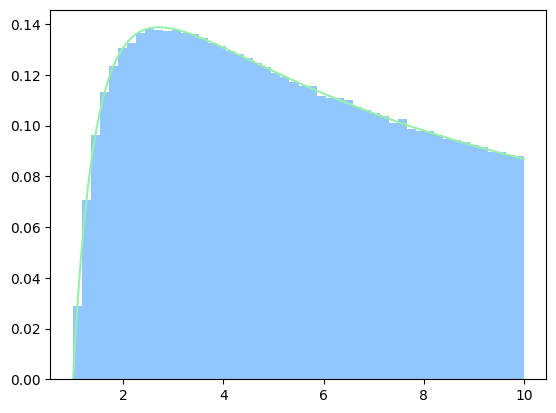

In [50]:
plt.hist(x, density = True, bins = 50);

p = np.linspace(1, theta, 1000)
plt.plot(p, alpha * (np.log(p)/np.log(theta)) * (1/p/np.log(theta)))

In [51]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

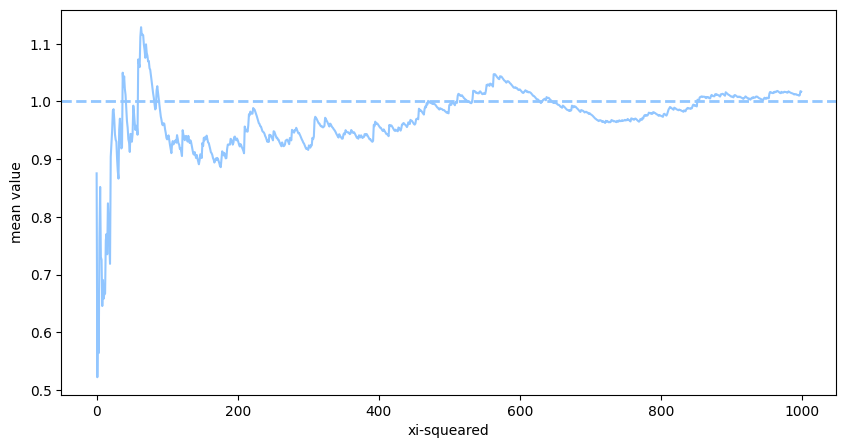

In [5]:
n_obs = 10**6

norm_rv = sts.norm(0, 1)
x = norm_rv.rvs(n_obs)
x = (x*x).cumsum() / np.arange(1, n_obs + 1)
plt.figure(figsize=(10,5))
plt.plot(x[:10**3])
plt.axhline(1, linestyle='dashed', linewidth=2)
plt.xlabel('xi-squeared')
plt.ylabel('mean value');

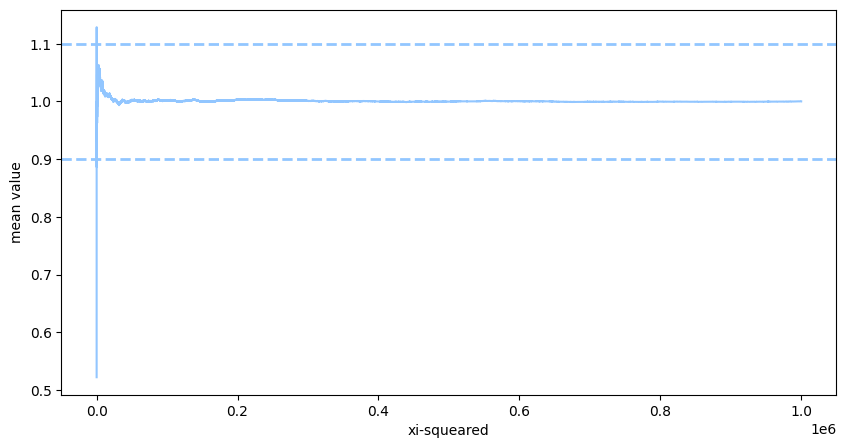

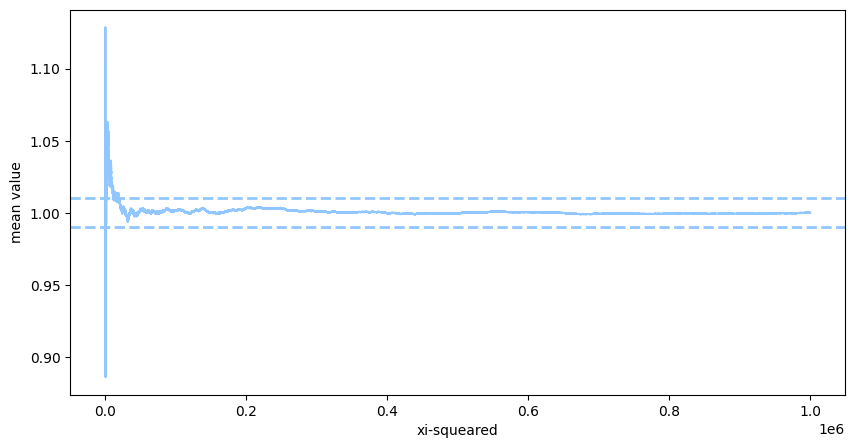

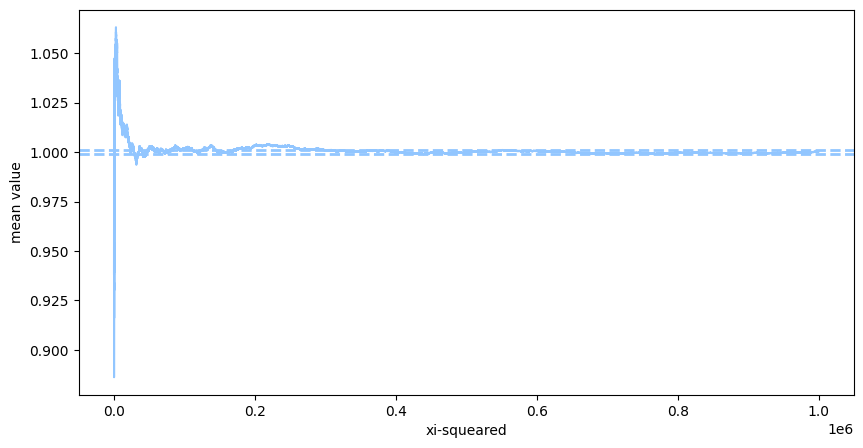

In [11]:
eps = 0.1
N = 1

while eps >= 0.001:
    cur_x = x[N:]
    N += 10*5
    plt.figure(figsize=(10,5))
    plt.plot(cur_x)
    plt.axhline(1 + eps, linestyle='dashed', linewidth=2)
    plt.axhline(1 - eps, linestyle='dashed', linewidth=2)
    plt.xlabel('xi-squeared')
    plt.ylabel('mean value');
    eps /= 10
